## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [1]:
api_key = "9X7DE2TA5LM3R7W2"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [2]:
ticker = "FCN"

Import the appropriate libraries in the lines below each comment:

In [3]:
import pandas as pd #pandas
import requests #requests
from alpha_vantage.timeseries import TimeSeries #alpha_vantage TimeSeries class
import matplotlib.pyplot as plt #mmatplotlib.pyplot as plt

#### Access API through an HTTP request

Assign the API url to the variable "link".
<br />(refer to the Alpha Vantage documention)
<br />
<br />Format the url string to include the "api_key" variable and the "ticker" variable Reassign the url u

In [9]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=1min&apikey={api_key}"
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=FCN&interval=1min&apikey=9X7DE2TA5LM3R7W2


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [11]:
FCN = requests.get(link)

Print the HTTP response:

In [12]:
print (FCN)

<Response [200]>


Print the data:

In [13]:
print(FCN.text)

{
    "Meta Data": {
        "1. Information": "Intraday (1min) open, high, low, close prices and volume",
        "2. Symbol": "FCN",
        "3. Last Refreshed": "2019-09-23 16:00:00",
        "4. Interval": "1min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (1min)": {
        "2019-09-23 16:00:00": {
            "1. open": "107.7700",
            "2. high": "107.8200",
            "3. low": "107.7600",
            "4. close": "107.7600",
            "5. volume": "8684"
        },
        "2019-09-23 15:59:00": {
            "1. open": "107.8500",
            "2. high": "107.8600",
            "3. low": "107.7600",
            "4. close": "107.7700",
            "5. volume": "2436"
        },
        "2019-09-23 15:58:00": {
            "1. open": "107.8000",
            "2. high": "107.8300",
            "3. low": "107.8000",
            "4. close": "107.8000",
            "5. volume": "861"
        },
        "2019-09-23 15:57:

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier. Assign your API key to the key argument. Use "pandas" as an output format.

In [14]:
ts = TimeSeries(key=api_key,output_format='pandas')

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [15]:
data, meta_data = ts.get_intraday(symbol=ticker ,interval='1min', outputsize='compact')

Print the data:

In [16]:
print(data)

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2019-09-23 13:28:00  108.635  108.730  108.635   108.730      289.0
2019-09-23 13:29:00  108.740  108.740  108.740   108.740      249.0
2019-09-23 13:32:00  108.740  108.810  108.670   108.740      840.0
2019-09-23 13:34:00  108.680  108.680  108.580   108.580      661.0
2019-09-23 13:35:00  108.605  108.630  108.605   108.630      330.0
2019-09-23 13:36:00  108.585  108.640  108.585   108.630     1441.0
2019-09-23 13:37:00  108.605  108.605  108.540   108.540      932.0
2019-09-23 13:38:00  108.510  108.510  108.500   108.500     1163.0
2019-09-23 13:39:00  108.500  108.500  108.500   108.500      127.0
2019-09-23 13:40:00  108.490  108.520  108.490   108.490      972.0
2019-09-23 13:41:00  108.530  108.530  108.510   108.510      321.0
2019-09-23 13:42:00  108.490  108.490  108.420   108.420      666.0
2019-09-23 13:43:00  108.400  108.400  108.400  

Plot one column of the time series data with the ticket symbol as the title of the graph.
<br />(refer to prior problem set examples)

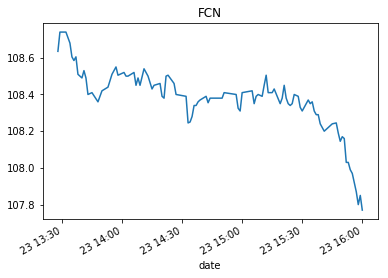

In [22]:
data['1. open'].plot()
plt.title(ticker)
plt.show()

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [23]:
data.to_excel('my_FCN_stock_data.xls')